In [127]:
import pandas as pd

In [128]:
bitcoin = pd.read_csv('datasets/coin_Bitcoin.csv')
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [129]:
bitcoin.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [130]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
bitcoin.set_index('Date', inplace=True)
bitcoin.index.freq = 'D'
bitcoin.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


<Axes: xlabel='Date'>

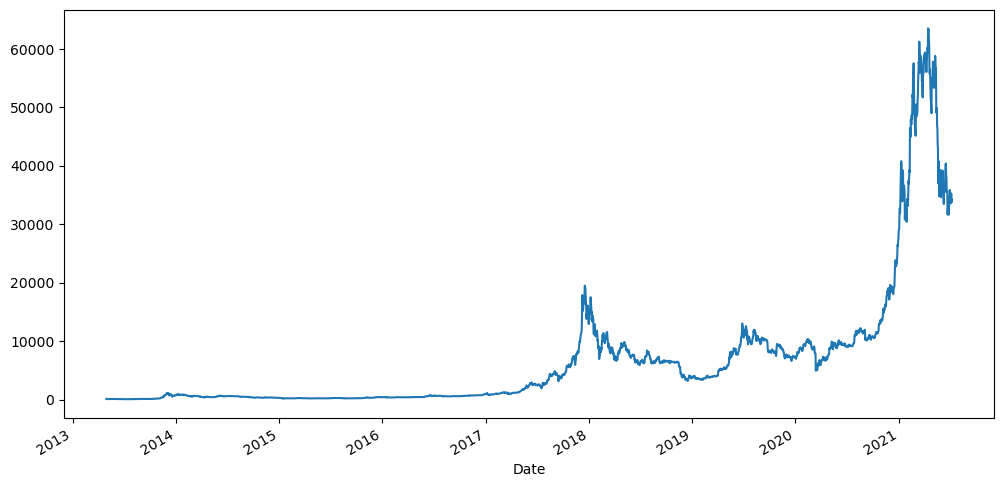

In [131]:
bitcoin['Close'].plot(figsize=(12, 6))

In [132]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Freq: D
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   High       2991 non-null   float64
 4   Low        2991 non-null   float64
 5   Open       2991 non-null   float64
 6   Close      2991 non-null   float64
 7   Volume     2991 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 233.7+ KB


In [133]:
def create_lagged_features(df, lag=30):
    df_new = df[['Close']].copy()
    for i in range(lag+1, 1, -1):
        df_new[f'lag_{i}'] = df_new['Close'].shift(i)
    return df_new

bitcoin_lagged = create_lagged_features(bitcoin, lag=30)
bitcoin_lagged.dropna(inplace=True)
bitcoin_lagged.head()

,Close,lag_31,lag_30,lag_29,lag_28,lag_27,lag_26,lag_25,lag_24,lag_23,...,lag_11,lag_10,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2
Date,,,,,,,,,,,,,,,,,,,,,
2013-05-30 23:59:59,128.798996,144.539993,139.000000,116.989998,105.209999,97.750000,112.500000,115.910004,112.300003,111.500000,...,121.989998,122.000000,122.879997,123.889000,126.699997,133.199997,131.979996,133.479996,129.744995,129.000000
2013-05-31 23:59:59,129.000000,139.000000,116.989998,105.209999,97.750000,112.500000,115.910004,112.300003,111.500000,113.566002,...,122.000000,122.879997,123.889000,126.699997,133.199997,131.979996,133.479996,129.744995,129.000000,132.300003
2013-06-01 23:59:59,129.300003,116.989998,105.209999,97.750000,112.500000,115.910004,112.300003,111.500000,113.566002,112.669998,...,122.879997,123.889000,126.699997,133.199997,131.979996,133.479996,129.744995,129.000000,132.300003,128.798996
2013-06-02 23:59:59,122.292000,105.209999,97.750000,112.500000,115.910004,112.300003,111.500000,113.566002,112.669998,117.199997,...,123.889000,126.699997,133.199997,131.979996,133.479996,129.744995,129.000000,132.300003,128.798996,129.000000
2013-06-03 23:59:59,122.222000,97.750000,112.500000,115.910004,112.300003,111.500000,113.566002,112.669998,117.199997,115.242996,...,126.699997,133.199997,131.979996,133.479996,129.744995,129.000000,132.300003,128.798996,129.000000,129.300003


In [134]:
train = bitcoin_lagged.iloc[:-30]
test = bitcoin_lagged.iloc[-30:]

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = train.drop('Close', axis=1)
y = train['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

RandomForestRegressor(random_state=42)

In [ ]:
param_grid = {
    

In [136]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = model.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)*100

3.7585474944827744

In [143]:
import numpy as np


def make_predictions(test_data, model):
    n = len(test_data)
    test_prediction_rfr = []
    for i in range(n):
        X_test = test_data.drop('Close', axis=1)
        y_pred = model.predict(X_test.iloc[i].values.reshape(1, -1))[0]
        test_prediction_rfr.append(y_pred)

    return test_prediction_rfr


test_prediction_rfr = make_predictions(test, model)

c:\Users\mwdzi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mwdzi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mwdzi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mwdzi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mwdzi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mwdzi\anaconda3\Lib\site-packages\sklearn\base.py:464: U

In [144]:
mean_absolute_percentage_error(test['Close'], test_prediction_rfr)*100

5.183733806000388

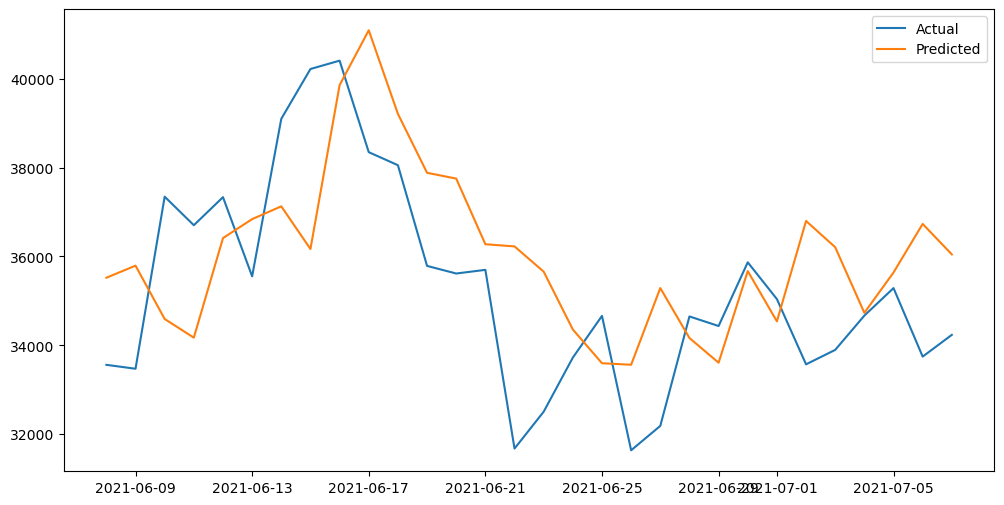

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, test_prediction_rfr, label='Predicted')
plt.legend()
plt.show()